In [ ]:
from google.colab import files
# upload Canada_elections_2021.csv
uploaded = files.upload()

Saving Canadian_elections_2021.csv to Canadian_elections_2021 (1).csv


In [ ]:
# upload sentiment_analysis.csv
uploaded = files.upload()

Saving sentiment_analysis.csv to sentiment_analysis (1).csv


In [362]:
# Basic basic package to handle data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [363]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import html
import string
from html.parser import HTMLParser
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import seaborn as sns

from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [364]:
# Import Data Cleaning related package
import re
import html
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 # 0. Data Imported

In [365]:
# import sentiment_analysis.csv as df_sa
df_sa = pd.read_csv('sentiment_analysis.csv',low_memory=False)
print("Shape of sentiment_analysis.csv: ",df_sa.shape)
# 0 stands for negative and 1 stands for positive
# ID is useless in this sentiment analysis, so we drop this column
df_sa = df_sa[['text','label']]
print("Revised Shape of sentiment_analysis.csv: ",df_sa.shape)
df_sa

Shape of sentiment_analysis.csv:  (550391, 3)
Revised Shape of sentiment_analysis.csv:  (550391, 2)


,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...
550386,@goddesses_o I can't stop watching her...mm. M...,0
550387,Poor old Tom Odell doesn't look like he would ...,0
550388,#antsmasher I smashed 7 ants in this awesome ...,1
550389,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [366]:
# import Canadian_elections_2021.csv as df_ce
df_ce = pd.read_csv('Canadian_elections_2021.csv',low_memory=False)
print("Shape of Canadian_elections_2021.csv: ",df_ce.shape)
df_ce

Shape of Canadian_elections_2021.csv:  (1002, 3)


,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


# **1. Data cleaning (12 Marks)**  
The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’.  
Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below. Remember to use the same pipeline for both datasets.

*   All html tags and attributes (i.e., /<[^>]+>/) are removed.
*   Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
*   All URLs are removed.
*   All characters in the text are in lowercase.
*   All stop words are removed. Be clear in what you consider as a stop word.
*   If a tweet is empty after pre-processing, it should be preserved as such.





In [464]:
# your code start from here.
print('The shape of the sentiment analysis data set is:',df_sa.shape)
print('The shape of the Canadian elections data set is:',df_ce.shape)

The shape of the sentiment analysis data set is: (550391, 2)
The shape of the Canadian elections data set is: (1002, 3)


In [465]:
# Our target will be sentiment so let's see if our data is balanced or unbalanced 
df_sa['label'].value_counts()

1    371341
0    179050
Name: label, dtype: int64

We can notice that there are more positive tweets in the sentiment analysis dataset than negative tweets. There are as twice positive tweets than negative. We need to keep in mind that our data is unbalanced.

In [369]:
# now we can start vy cleaning the data
# now I will define a list of stopwords that needs to be removed 
nltk.download('stopwords')
stopwords_to_be_removed=stopwords.words('english')
print(stopwords_to_be_removed)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

We can see at the end of the stopwords list all of the words are negative words. If I use the list as is from nltk those words will be removed. However if someone say 'I shouldn't vote to Trudeau' and after removing the stopword shouldn't not this will transform to 'vote Trudeau' and this is the complete opposite of the intention of the tweet. Therefore the last part of this list will be removed so I can keep those negative world since they  will give important insight to my futur models.

In [370]:
stopwords_to_be_removed=stopwords_to_be_removed[:len(stopwords_to_be_removed)-35]

In [371]:
stopwords_to_be_removed

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [372]:
# now we ne need to remove all html tags and attribuutes@
# replaces Html characer codes witn an ASCII equivalent,
# removes all URLs and lowercase all charachters in the text, 
# let's do a function in order to do that 
# sub() function is used to replace occurrences
# of a particular sub-string with another sub-string.

def clean_htmlandothers(text,stop_word_list=stopwords_to_be_removed):
  # All html tags and attributes are removed 
  cleaned_text =re.sub(r'<[^<]+?>', ' ',text)
  # HTML codes are replaced with their ASCII equivalent 
  cleaned_text= html.unescape(cleaned_text)
  # URLs are removed replace them buy nothing ""
  cleaned_text=re.sub(r"http\S+", " ",cleaned_text)
  # I will also remove the name of the twitter user 
  # the name is always after @ and we will remove the name after it
  # I will remove the name of the user each time coming after @
  cleaned_text = re.sub(r"@[A-Za-z0-9_]+", " ",cleaned_text)

  # Remove the retweets since they are not useful 
  cleaned_text=re.sub(r'RT : ',' ',cleaned_text)
  cleaned_text=re.sub(r'RT',' ',cleaned_text)
  cleaned_text=re.sub(r'rt : ',' ',cleaned_text)
  cleaned_text=re.sub(r'rt',' ',cleaned_text)

  # Remove the punctuations since it is not that useful for sentiments
  cleaned_text=cleaned_text.translate(str.maketrans("","",string.punctuation))
  cleaned_text=cleaned_text.translate(str.maketrans("","",string.punctuation))

  # by exploring the data we find that some tweets starts with a-b for some reasons
  # let's remove them 
  cleaned_text = re.sub(r"b'",' ',cleaned_text)
  cleaned_text = re.sub('’', " ",cleaned_text)     
  cleaned_text = re.sub('[^a-z]+ ', ' ',cleaned_text)

  # Remove the emojis symbols and the emoticonsand that  make non sense 
  # and can not be analyzed by  our model 

  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F" # emoticons
    u"\U0001F300-\U0001F5FF" # symbols & pictographs
    u"\U0001F680-\U0001F6FF" # transport & map symbols
    u"\U0001F1E0-\U0001F1FF" # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
  cleaned_text = emoji_pattern.sub(r'',cleaned_text)

  # Remove white spaces we also added extra white spaces so let's remove them
  cleaned_text=cleaned_text.strip()

  # keeeping 1 space so we won't have empt spaces at the end 
  # after I replaced everything with an empty space above 
  cleaned_text=re.sub('/\s\s+/g', " ", cleaned_text)

  # All lowercase
  cleaned_text=cleaned_text.lower()

  # Finally let's remove the stopwords from the list defined 

  # function that splits a given sentence into words
  text_tokens=word_tokenize(cleaned_text)
  remaining_words=[word for word in text_tokens if not word in stop_word_list]
  cleaned_text=' '.join(remaining_words)

  return cleaned_text

In [373]:
# Cleaning both datasets the same way
df_sa['text'] = df_sa['text'].apply(clean_htmlandothers)
df_ce['text'] = df_ce['text'].apply(clean_htmlandothers)

In [374]:
df_sa

,text,label
0,josh jenkins looking forward breeders crown su...,1
1,congratulations pakistan becoming no1testteam ...,1
2,september taking maine mendoza surprise thanks...,1
3,newly painted walls thanks million custodial p...,1
4,excited announce july feschotte lab relocating,1
...,...,...
550386,cant stop watching hermm,0
550387,poor old tom odell doesnt look like would know...,0
550388,antsmasher smashed ants awesome gamehjfjfi,1
550389,morning girls wonderful friday,1


In [375]:
df_ce

,text,sentiment,negative_reason
0,canadian election power grab trudeau yes take ...,negative,calling election early
1,hope trudeau loses canadian election tomorrow ...,negative,covid
2,dear canadians election test progressive wheth...,positive,NaN
3,canadian friends never forget trudeau years ma...,negative,calling election early
4,sorry voted life election fighting freedoms ca...,positive,NaN
...,...,...,...
997,absolutely horrible canada fo hcoming election...,negative,others
998,trudeau imposes gun control policies utterly f...,negative,gun control
999,canada election stolen thugs uneducated goons ...,negative,others
1000,otoole amends platform gun control questions r...,negative,tell lies


# **2. Exploratory analysis (15 marks)**  
1. Design a simple procedure that determines the political party (Liberal, Conservative, New Democratic Party (NDP), The People's Party of Canada (PPC)) of a given tweet and apply this procedure to all the tweets in the Canadian Elections dataset. A suggestion would be to look at relevant words and hashtags in the tweets that identify to certain political parties or candidates. What can you say about the distribution of the political affiliations of the tweets?  

2. Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc.) that visualizes some aspect of the generic tweets in sentiment_analysis.csv and another figure for the 2021 Canadian Elections tweets. All graphs and plots should be readable and have all axes that are appropriately labelled. Discuss your findings.

**Part 1:**

In [376]:
# import package related to Exploratory analysis
from wordcloud import WordCloud
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

In [377]:
# your code start from here.
# in order to determine the different the different political parties (Liberal, conservative,NDP...)
# will create a list of each political party using word and hasha=taggs in the 
# tweets that identify to the given political party or candidate

list_liberal = '|'.join(['liberal','trudeau','justin','justintrudeau','voteliberal','voteliberals','liberals','voteliberalmajority','voteliberal2021','liberalmajority'])
list_conservative = '|'.join(['conservative','erin', "otoole",'toole',"erinotoole",'voteconservative','votecpc','cpc','conservatives','votecpc2021'])
list_NDP = '|'.join(['ndp','jagmeet','singh','jagmeetsingh','thejagmeetsingh','votendp','votendp2021'])
list_PPC = '|'.join(['ppc','maxime','bernier','maximebernier','voteppc','voteppc2021'])


In [378]:
list_liberal

'liberal|trudeau|justin|justintrudeau|voteliberal|voteliberals|liberals|voteliberalmajority|voteliberal2021|liberalmajority'

In [379]:
# Now that we hace the list of key words to determine the political party 
# I will create a new dataframe but now with a column called political party 
df_with_political=df_ce.copy()
# Initialize a new column called 'Political Party'
df_with_political['Political Party']=''

In [380]:
df_with_political

,text,sentiment,negative_reason,Political Party
0,canadian election power grab trudeau yes take ...,negative,calling election early,
1,hope trudeau loses canadian election tomorrow ...,negative,covid,
2,dear canadians election test progressive wheth...,positive,NaN,
3,canadian friends never forget trudeau years ma...,negative,calling election early,
4,sorry voted life election fighting freedoms ca...,positive,NaN,
...,...,...,...,...
997,absolutely horrible canada fo hcoming election...,negative,others,
998,trudeau imposes gun control policies utterly f...,negative,gun control,
999,canada election stolen thugs uneducated goons ...,negative,others,
1000,otoole amends platform gun control questions r...,negative,tell lies,


In [381]:
for i in range(len(df_with_political)):

  # initialize the boolean variables 
  liberal= False
  conservative = False
  NDP= False 
  PPC = False
  # .search() ---> Scan through string looking for a match to the pattern, returning
  #a Match object, or None if no match was found.
  if (re.search(list_liberal,df_with_political['text'].iloc[i])!=None):
    liberal=True
    # iloc locate the rows by index 0,1,2,3.. for the rows locate 
    df_with_political['Political Party'].iloc[i] = 'Liberal'

  if (re.search(list_conservative,df_with_political['text'].iloc[i])!=None):
    conservative=True
    # iloc locate the rows by index 0,1,2,3.. for the rows locate 
    df_with_political['Political Party'].iloc[i] = 'Conservative'


  if (re.search(list_NDP,df_with_political['text'].iloc[i])!=None):
    NDP=True
    # iloc locate the rows by index 0,1,2,3.. for the rows locate 
    df_with_political['Political Party'].iloc[i] = 'NDP'
  
  if (re.search(list_PPC,df_with_political['text'].iloc[i])!=None):
    PPC=True
    # iloc locate the rows by index 0,1,2,3.. for the rows locate 
    df_with_political['Political Party'].iloc[i] = 'PPC'
  
  if(liberal + conservative + NDP + PPC) >1 : 
    df_with_political['Political Party'].iloc[i]='Many'

  if(liberal + conservative + NDP + PPC)==0:
    df_with_political['Political Party'].iloc[i]='Unclear'
  


In [382]:
df_with_political

,text,sentiment,negative_reason,Political Party
0,canadian election power grab trudeau yes take ...,negative,calling election early,Liberal
1,hope trudeau loses canadian election tomorrow ...,negative,covid,Liberal
2,dear canadians election test progressive wheth...,positive,NaN,Unclear
3,canadian friends never forget trudeau years ma...,negative,calling election early,Liberal
4,sorry voted life election fighting freedoms ca...,positive,NaN,PPC
...,...,...,...,...
997,absolutely horrible canada fo hcoming election...,negative,others,Unclear
998,trudeau imposes gun control policies utterly f...,negative,gun control,Many
999,canada election stolen thugs uneducated goons ...,negative,others,Unclear
1000,otoole amends platform gun control questions r...,negative,tell lies,Conservative


In [383]:
df_with_political['Political Party'].value_counts()

Unclear         352
Liberal         267
Conservative    187
Many            175
PPC              11
NDP              10
Name: Political Party, dtype: int64

Using this method we were able to detect 66.2 % of the political affiliation of the tweets dataset that we have. Moreover many tweets are ambiguous/unclear (353), we can optimize more our method later.
It is good to note that most of the labaled tweets belongs to the Liberal or the conservative party. Also many tweets talked about many parties and were labeled as 'many'. And a very small number of tweets mentionned the PPC and the NDP.

Text(0.5, 1.0, 'Distribution of the different political parties')

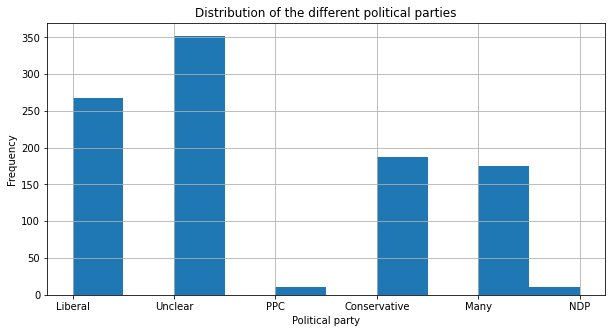

In [384]:
plt.figure(figsize=(10,5))
df_with_political['Political Party'].hist()
plt.ylabel('Frequency')
plt.xlabel('Political party')
plt.title('Distribution of the different political parties')

Since the most 2 relevant parties were the liberal and the conservative we will look closer into them

In [385]:
df_lib_cons = df_with_political[(df_with_political['Political Party'] =='Liberal')|(df_with_political['Political Party'] =='Conservative')]
df_lib_cons

,text,sentiment,negative_reason,Political Party
0,canadian election power grab trudeau yes take ...,negative,calling election early,Liberal
1,hope trudeau loses canadian election tomorrow ...,negative,covid,Liberal
3,canadian friends never forget trudeau years ma...,negative,calling election early,Liberal
5,vaccines guns key election otoole serious plan...,negative,covid,Conservative
7,say ive skeptical critical mainstream canadian...,negative,others,Conservative
...,...,...,...,...
990,armed intruder killed cirillo attacked parliam...,negative,gun control,Conservative
991,justin trudeau great salesman bullshit goes fa...,negative,calling election early,Liberal
993,ffs stop shit lie much otoole ffs shameful jou...,negative,tell lies,Conservative
995,people sick tired politicians see kind behavio...,negative,tell lies,Liberal


In [386]:
# negative tweets in each category (liberal and conservative)

#how many rows are liberal and negative form all the liberals 
# len() returns the number of rows 
neg_lib=(len(df_with_political[(df_with_political['Political Party']=='Liberal')&(df_with_political['sentiment']=='negative')])/len(df_with_political[(df_with_political['Political Party']=='Liberal')]))*100
# how many rows are conservative and negative from all the conservatives ? 
neg_cons=(len(df_with_political[(df_with_political['Political Party']=='Conservative')&(df_with_political['sentiment']=='negative')])/len(df_with_political[(df_with_political['Political Party']=='Conservative')]))*100

(40.0, 50.0)

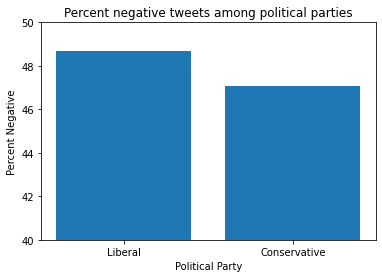

In [387]:
plt.bar(['Liberal','Conservative'],[neg_lib,neg_cons])
plt.ylabel('Percent Negative')
plt.xlabel('Political Party')
plt.title('Percent negative tweets among political parties')
plt.ylim((40,50))

We can see that both parties have almost half of their tweets are negative and the other half is positive. The liberal party has more relative negative sentiment speech than the conservative party.

Let's have a look deeper aboiut the reasons behind the negative sentiment for both parties.

In [388]:
df_with_political

,text,sentiment,negative_reason,Political Party
0,canadian election power grab trudeau yes take ...,negative,calling election early,Liberal
1,hope trudeau loses canadian election tomorrow ...,negative,covid,Liberal
2,dear canadians election test progressive wheth...,positive,NaN,Unclear
3,canadian friends never forget trudeau years ma...,negative,calling election early,Liberal
4,sorry voted life election fighting freedoms ca...,positive,NaN,PPC
...,...,...,...,...
997,absolutely horrible canada fo hcoming election...,negative,others,Unclear
998,trudeau imposes gun control policies utterly f...,negative,gun control,Many
999,canada election stolen thugs uneducated goons ...,negative,others,Unclear
1000,otoole amends platform gun control questions r...,negative,tell lies,Conservative


In [389]:
text_liberal=str(df_with_political[df_with_political['Political Party']=='Liberal']['negative_reason'])
text_conservative=str(df_with_political[df_with_political['Political Party']=='Conservative']['negative_reason'])

In [390]:
text_liberal

'0      calling election early\n1                      covid \n3      calling election early\n14                        NaN\n22     calling election early\n                ...          \n986                    others\n987                 tell lies\n988                   economy\n991    calling election early\n995                 tell lies\nName: negative_reason, Length: 267, dtype: object'

In [391]:
text_conservative

'5            covid \n7            others\n10          scandal\n15              NaN\n26      gun control\n           ...     \n983          others\n989       tell lies\n990     gun control\n993       tell lies\n1000      tell lies\nName: negative_reason, Length: 187, dtype: object'

In [392]:
# make a wordcloud
wordcloud_liberal = WordCloud(max_font_size=300, max_words=300,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(text_liberal)
wordcloud_conservative = WordCloud(max_font_size=300, max_words=300,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(text_conservative)

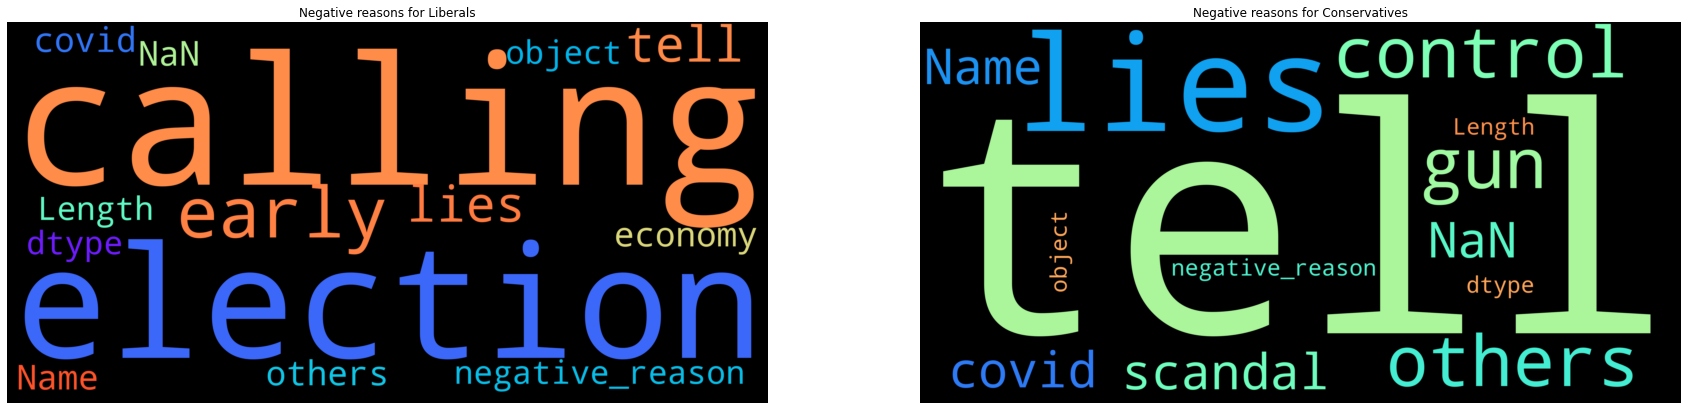

In [393]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,20))
ax1.imshow(wordcloud_liberal, interpolation='bilinear')
ax2.imshow(wordcloud_conservative, interpolation='bilinear')
ax1.set_title('Negative reasons for Liberals')
ax2.set_title('Negative reasons for Conservatives')
ax1.axis('off')
ax2.axis('off')
plt.show()

Now let's discover what are the most common words occuring in the sentiment analysis dataset.

In [394]:
df_sa.text

0         josh jenkins looking forward breeders crown su...
1         congratulations pakistan becoming no1testteam ...
2         september taking maine mendoza surprise thanks...
3         newly painted walls thanks million custodial p...
4            excited announce july feschotte lab relocating
                                ...                        
550386                             cant stop watching hermm
550387    poor old tom odell doesnt look like would know...
550388           antsmasher smashed ants awesome gamehjfjfi
550389                       morning girls wonderful friday
550390         bixbeat mixtape vol great iste join movement
Name: text, Length: 550391, dtype: object

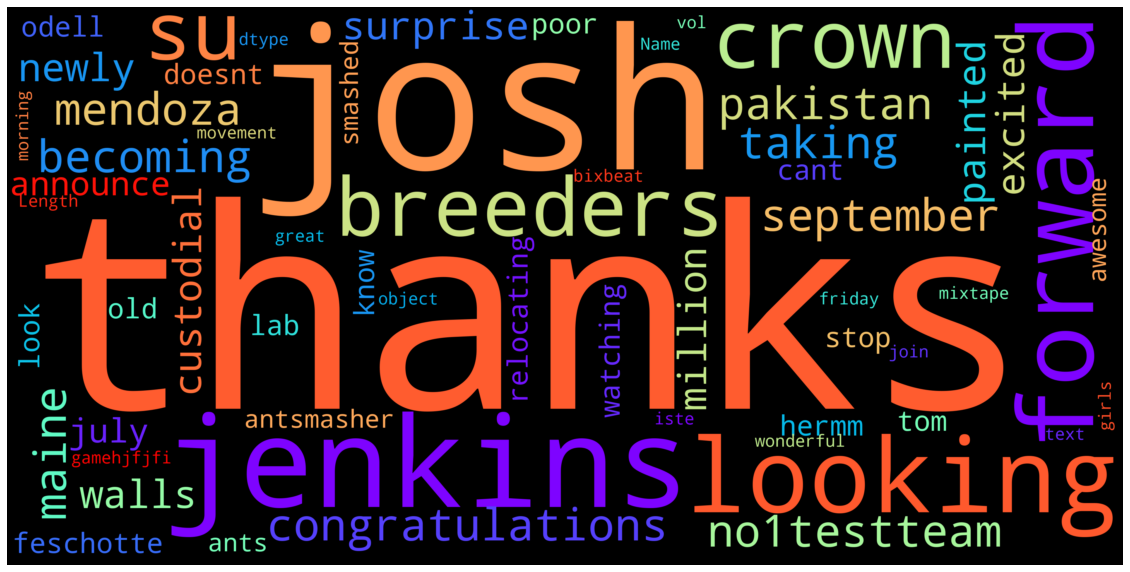

In [395]:
#Create a new string object from the given object. 
text_sentiment=str(df_sa.text)
wordcloud_sentiment = WordCloud(max_font_size=100, max_words=1000,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(text_sentiment)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud_sentiment, interpolation='bilinear')
plt.axis('off')
plt.show()

Now finally let's have a quick look about the different text tweets for all the 4 political parties. We will also use word cloud.

In [396]:
df_with_political[df_with_political['Political Party']=='Liberal']['text']

0      canadian election power grab trudeau yes take ...
1      hope trudeau loses canadian election tomorrow ...
3      canadian friends never forget trudeau years ma...
14     election kept canadians healthy alive canada g...
22     months pandemic justin trudeau needlessly pror...
                             ...                        
986    canadians give trudeau garneau etc another man...
987    canadians look shameless ex wife worst woman s...
988    election drawing near lying canadian media rel...
991    justin trudeau great salesman bullshit goes fa...
995    people sick tired politicians see kind behavio...
Name: text, Length: 267, dtype: object

In [397]:
str(df_with_political[df_with_political['Political Party']=='Liberal']['text'])

'0      canadian election power grab trudeau yes take ...\n1      hope trudeau loses canadian election tomorrow ...\n3      canadian friends never forget trudeau years ma...\n14     election kept canadians healthy alive canada g...\n22     months pandemic justin trudeau needlessly pror...\n                             ...                        \n986    canadians give trudeau garneau etc another man...\n987    canadians look shameless ex wife worst woman s...\n988    election drawing near lying canadian media rel...\n991    justin trudeau great salesman bullshit goes fa...\n995    people sick tired politicians see kind behavio...\nName: text, Length: 267, dtype: object'

In [398]:
tweet_liberal=str(df_with_political[df_with_political['Political Party']=='Liberal']['text'])
tweet_conservative=str(df_with_political[df_with_political['Political Party']=='Conservative']['text'])
tweet_NDP=str(df_with_political[df_with_political['Political Party']=='NDP']['text'])
tweet_PPC=str(df_with_political[df_with_political['Political Party']=='PPC']['text'])

In [399]:
# generating word clouds
word_cloud_liberal= WordCloud(max_font_size=100, max_words=200,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(tweet_liberal)
word_cloud__conservative=WordCloud(max_font_size=100, max_words=200,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(tweet_conservative)
word_cloud_NDP=WordCloud(max_font_size=100, max_words=200,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(tweet_NDP)
word_cloud_PPC=WordCloud(max_font_size=100, max_words=200,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(tweet_PPC)

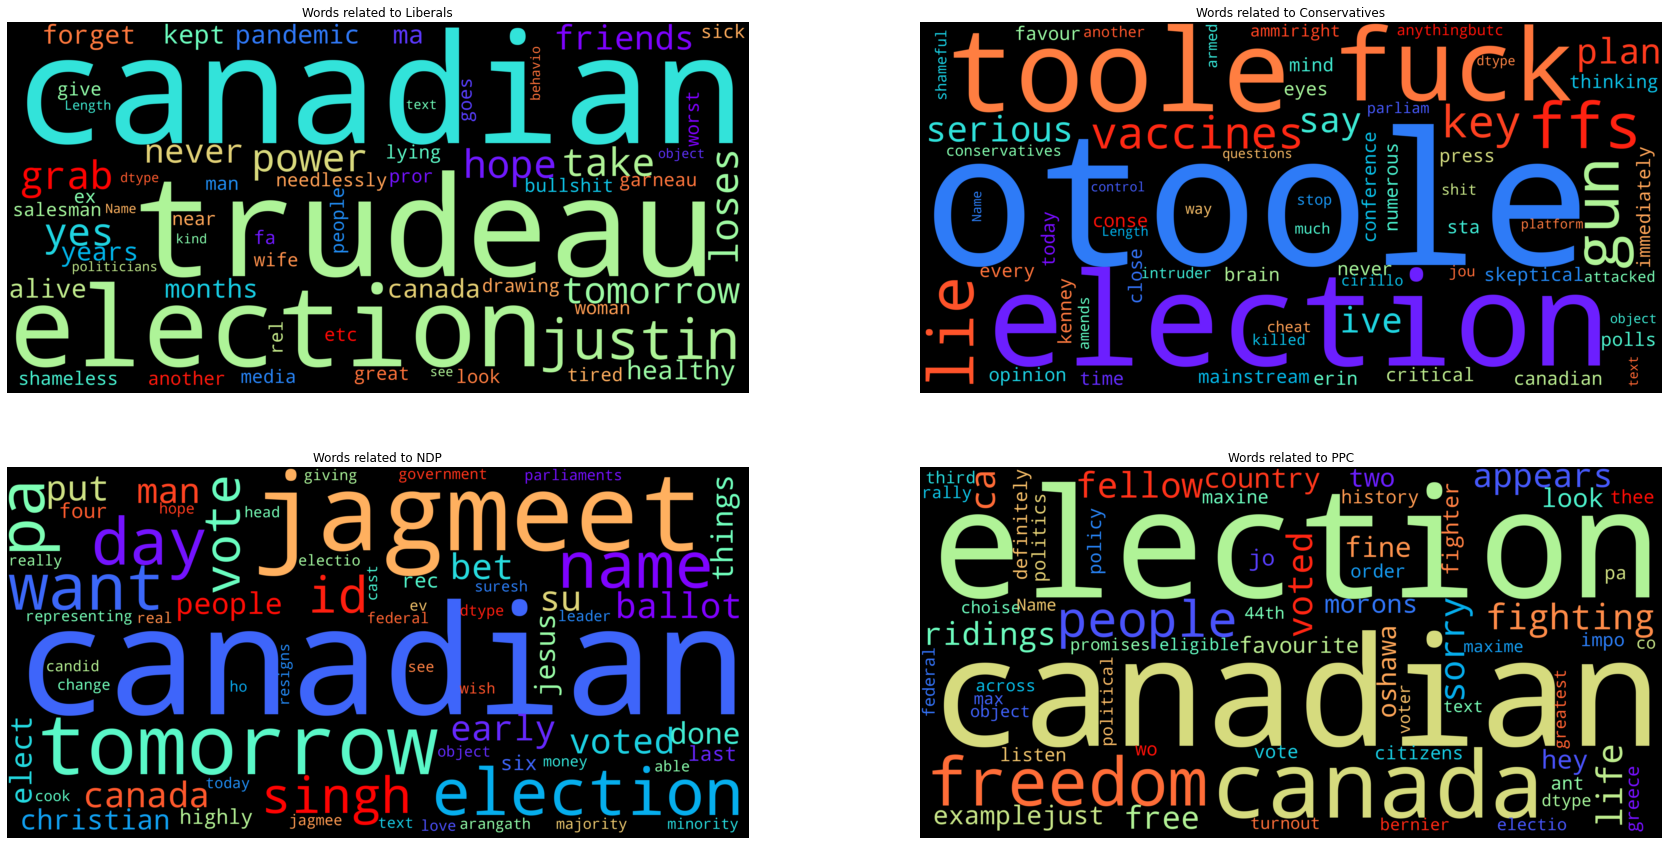

In [400]:

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(30,15))
ax1.imshow(word_cloud_liberal, interpolation='bilinear')
ax2.imshow(word_cloud__conservative, interpolation='bilinear')
ax3.imshow(word_cloud_NDP, interpolation='bilinear')
ax4.imshow(word_cloud_PPC, interpolation='bilinear')
ax1.set_title('Words related to Liberals')
ax2.set_title('Words related to Conservatives')
ax3.set_title('Words related to NDP')
ax4.set_title('Words related to PPC')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
plt.show()

# **3. Model preparation (13 marks)**  
Split the generic tweets randomly into training data (70%) and test data (30%).  
Prepare the data to try seven classification algorithms – logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest and XGBoost, where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try two different types of features, Bag of Words (word frequency) and TF-IDF on all 7 models. (Hint: Be careful about when to split the dataset into training and testing set.)

In [401]:
# import package related to Model Preparation
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [402]:
# your code start from here.
# split before applying tf-idf and Bag of Words 

# the tweets data
X=df_sa['text']
# the sentiment related to this data
y=df_sa['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.3)

In [403]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape) 

(385273,) (385273,)
(165118,) (165118,)


How many features to select? 

In [ ]:
# the accuracy of our vectorizer increases with the number of features 
# but having a high number of features will increase the model complexity and the running time 
# Also we will reacg a point where the accuracy will not improve more 
# we should find a tradeoff using the graph
# let's take a look at this to see when 
accuracy_features = []
feature_numbers = [500,1000,10000,15000,20000,50000,100000,1000000]
for i in feature_numbers:
  vectorizer = CountVectorizer(max_features=i) 
  X_train_WF = vectorizer.fit_transform(X_train) 
  X_test_WF = vectorizer.transform(X_test)
  model = MultinomialNB()
  model.fit(X_train_WF,y_train)
  prediction = model.predict(X_test_WF)
  accuracy = accuracy_score(prediction,y_test)
  accuracy_features.append(accuracy)

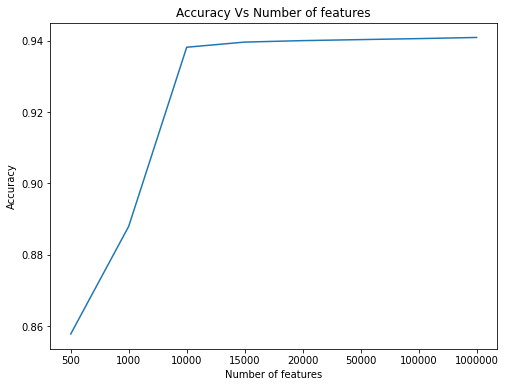

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(len(feature_numbers)),accuracy_features)
plt.xticks(range(len(feature_numbers)),feature_numbers)
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title('Accuracy Vs Number of features')
plt.show()

In [ ]:
# we can cleary that we reach a limit of improvement after 10000 features our model accuracy do not imporve a lot. 
# Therefore I will choose 10k features since no need for more

# Applying word frequency to my data
vectorizer = CountVectorizer(max_features=10000)
X_train_WF = vectorizer.fit_transform(X_train) 
X_test_WF = vectorizer.transform(X_test)

# Applying tf-idf to my data 
vectorizer = TfidfVectorizer(stop_words = 'english', use_idf = True, max_features = 10000, ngram_range = (1,1))
X_train_tf = vectorizer.fit_transform(X_train) 
X_test_tf = vectorizer.transform(X_test)


# **4. Model implementation and tuning (60 marks)**

**4.1)** Using both types of features (Bag of Words and TF-IDF), train models on the training data from generic tweets and apply the model to the test data to obtain an accuracy value.

**a.** Evaluate the trained model with the best performance on the Canadian Elections data. How well do your predictions match the sentiment labelled in the Canadian elections data?

In [404]:
import time

# import modelization related packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.svm import LinearSVC    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import GridSearchCV

**Using Bag of Words**

In [ ]:
# I will assume that my real test data is the canadian elections 
# Therefore the test data for the generic tweets (from the sentiment analysis data) can be taken 
# as the validation data.
accuracy_WF=[]
models_list = ['Naive Bayes', 'XGBoost', 'Logistic Regression', 'K_NN','SVM', 'Decision Tree', 'Random Forest']
models=[MultinomialNB(),xgb.XGBClassifier(), LogisticRegression(), KNeighborsClassifier(),LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier()]

for model in models:
  model.fit(X_train_WF,y_train)
  prediction =model.predict(X_test_WF)
  accuracy=accuracy_score(prediction,y_test)
  accuracy_WF.append(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_WF

[0.938123039280999,
 0.7611041800409404,
 0.9533303455710461,
 0.9047650770963795,
 0.9521130343148536,
 0.9332901319056675,
 0.9454450756428736]

**Using tf_idf** 

In [ ]:
# Lets do the same but for our TF_IDF
accuracy_tf = []
models_list = ['Naive Bayes', 'XGBoost', 'Logistic Regression', 'K_NN','SVM', 'Decision Tree', 'Random Forest']
models = [MultinomialNB(), xgb.XGBClassifier(), LogisticRegression(), KNeighborsClassifier(),LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier()]
for model in models:
  model.fit(X_train_tf,y_train)
  prediction = model.predict(X_test_tf)
  accuracy = accuracy_score(prediction,y_test)
  accuracy_tf.append(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy_tf

[0.9236848799040686,
 0.8303395147712544,
 0.9504838963650238,
 0.8029893772938141,
 0.9505081214646495,
 0.9322605651715743,
 0.9449545173754527]

In [ ]:
df = pd.DataFrame(columns=models_list,index=['WF','TF_IDF'])
df.iloc[0]= accuracy_WF
df.iloc[1]= accuracy_tf
df

,Naive Bayes,XGBoost,Logistic Regression,K_NN,SVM,Decision Tree,Random Forest
WF,0.938123,0.761104,0.95333,0.904765,0.952113,0.93329,0.945445
TF_IDF,0.923685,0.83034,0.950484,0.802989,0.950508,0.932261,0.944955


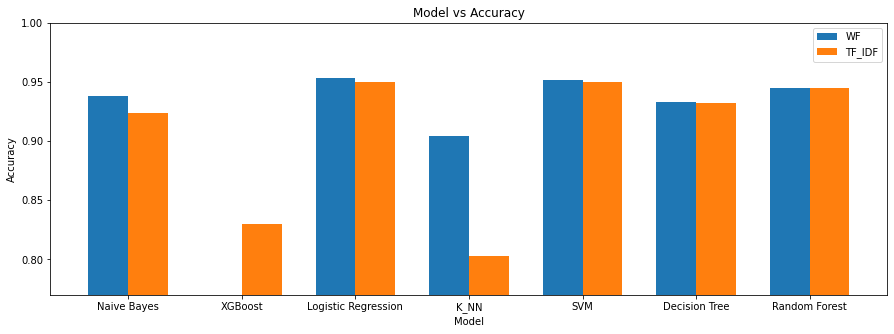

In [ ]:
index = np.arange(7)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(15,5))
wf = ax.bar(index, accuracy_WF, bar_width,
                label="WF")

tfidf = ax.bar(index + bar_width, accuracy_tf,
                 bar_width, label="TF_IDF")

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model vs Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models_list)
ax.set_ylim(0.77,1)
ax.legend()

plt.show()

As we can visualize in the comparative table and the graph above, the model with the best performance is the logistic regression model with word frequency features and also logistic regression with TF_IDF as features hase almost the same accuracy (which is slightly less). Therefore the best model is logistic regression with Word frequency as features. I will use it to test it on the Canadian elections data.

Let's replace the negative by 0 and the positive by 1 in the sentiment column. 

In [405]:
df_ce['sentiment']=df_ce['sentiment'].replace(['negative','positive'],[0,1])
df_ce.head()

,text,sentiment,negative_reason
0,canadian election power grab trudeau yes take ...,0,calling election early
1,hope trudeau loses canadian election tomorrow ...,0,covid
2,dear canadians election test progressive wheth...,1,NaN
3,canadian friends never forget trudeau years ma...,0,calling election early
4,sorry voted life election fighting freedoms ca...,1,NaN


In [406]:
# Now that I replaced positive and negative sentiment with 1 and 0 respectively I can evaluate my best model with the canadian elections data
# But first I need to vectorize my canadian elections data based on the vectorizer from the training data
# # Applying word frequency to my data
X_test_elections = df_ce['text']
y_test_elections = df_ce['sentiment']
vectorizer = CountVectorizer(max_features=10000 ) 
vectorizer.fit(X_train) # Fitting on the training data which is the sentiment analysis dataset
X_test_elections_WF = vectorizer.transform(X_test_elections)

best_model = LogisticRegression()
best_model.fit(X_train_WF,y_train)    #Here also we fit the model on the training data which is the sentiment analysis dataset that is vectorized
prediction = best_model.predict(X_test_elections_WF)
best_accuracy = accuracy_score(prediction,y_test_elections)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


70 % accuracy while predicting the canadian election sentiment.

In [407]:
print("The logistic regression model with WF got an accuracy of:",round(best_accuracy*100,2),"% while predicting the canadian election sentiment ")

The logistic regression model with WF got an accuracy of: 70.16 % while predicting the canadian election sentiment 


**b.** Propose two other metrics you could use to evaluate the models. In one to two sentences, provide reasoning for each metric

As we can see below the data is a unbalanced and contain more positives (1) than negative (0) therefore it is better to consider other performance measure beyond the accuracy like precision, recall and F1_score. Moreover political parties will be more concerned with -ve sentiments tweets in order to improve their campaign and hopefully change change the mind of those people therefore they will be more interested in getting in specificity (True positive rate) and the sensivity (True Negative rate) of the prediction.
We will also get the accuracy for each political party also. 

In [408]:
df_ce['sentiment'].value_counts()

1    615
0    387
Name: sentiment, dtype: int64

In [409]:
df_sa['label'].value_counts()

1    371341
0    179050
Name: label, dtype: int64

In [410]:
# create 4 new dataframes for each political 
# apply our best model to them 
df_with_political['sentiment']=df_with_political['sentiment'].replace(['negative','positive'],[0,1])

In [411]:
df_with_political

,text,sentiment,negative_reason,Political Party
0,canadian election power grab trudeau yes take ...,0,calling election early,Liberal
1,hope trudeau loses canadian election tomorrow ...,0,covid,Liberal
2,dear canadians election test progressive wheth...,1,NaN,Unclear
3,canadian friends never forget trudeau years ma...,0,calling election early,Liberal
4,sorry voted life election fighting freedoms ca...,1,NaN,PPC
...,...,...,...,...
997,absolutely horrible canada fo hcoming election...,0,others,Unclear
998,trudeau imposes gun control policies utterly f...,0,gun control,Many
999,canada election stolen thugs uneducated goons ...,0,others,Unclear
1000,otoole amends platform gun control questions r...,0,tell lies,Conservative


4 Dataframes for each political party and apply the LR model 

In [412]:
df_liberal=df_with_political[df_with_political['Political Party']=='Liberal']
df_conservative=df_with_political[df_with_political['Political Party']=='Conservative']
df_ppc=df_with_political[df_with_political['Political Party']=='PPC']
df_ndp=df_with_political[df_with_political['Political Party']=='NDP']

In [413]:
X_test_liberal = df_liberal['text']
y_test_liberal = df_liberal['sentiment']

X_test_conservative = df_conservative['text']
y_test_conservative = df_conservative['sentiment']

X_test_ppc = df_ppc['text']
y_test_ppc = df_ppc['sentiment']

X_test_ndp = df_ndp['text']
y_test_ndp = df_ndp['sentiment']


vectorizer = CountVectorizer(max_features=10000 ) 
vectorizer.fit(X_train) 

#transform to wf
X_test_liberal_wf = vectorizer.transform(X_test_liberal)
X_test_conservative_wf = vectorizer.transform(X_test_conservative)
X_test_ppc_wf = vectorizer.transform(X_test_ppc)
X_test_ndp_wf = vectorizer.transform(X_test_ndp)

# best model 
best_model = LogisticRegression()
best_model.fit(X_train_WF,y_train)

# prediction 
prediction_liberal = best_model.predict(X_test_liberal_wf)
prediction_conservative = best_model.predict(X_test_conservative_wf)
prediction_ppc = best_model.predict(X_test_ppc_wf)
prediction_ndp = best_model.predict(X_test_ndp_wf)

# accuracy
accuracy_liberal = accuracy_score(prediction_liberal,y_test_liberal)
accuracy_conservative = accuracy_score(prediction_conservative,y_test_conservative)
accuracy_ppc = accuracy_score(prediction_ppc,y_test_ppc)
accuracy_ndp = accuracy_score(prediction_ndp,y_test_ndp)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [414]:
print('Liberal accuracy is:',round(accuracy_liberal*100,2),'%')
print('Conservative accuracy is:',round(accuracy_conservative*100,2),'%')
print('PPC accuracy is:',round(accuracy_ppc*100,2),'%')
print('NDP accuracy is:',round(accuracy_ndp*100,2),'%')

Liberal accuracy is: 72.28 %
Conservative accuracy is: 71.12 %
PPC accuracy is: 54.55 %
NDP accuracy is: 80.0 %


Confusion matrix for Liberal 

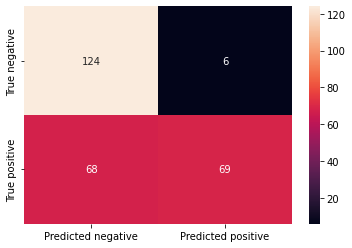

In [415]:
conmat = np.array(confusion_matrix(y_test_liberal, prediction_liberal))
confusion = pd.DataFrame(conmat, index=['True negative', 'True positive'],
                         columns=['Predicted negative','Predicted positive'])

sns.heatmap(confusion, annot=True, fmt = 'g')

Confusion matrix for Conservative

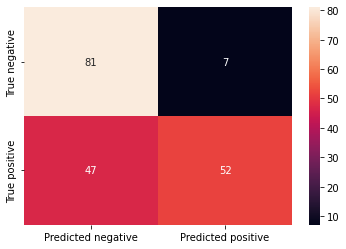

In [416]:
conmat = np.array(confusion_matrix(y_test_conservative, prediction_conservative))
confusion = pd.DataFrame(conmat, index=['True negative', 'True positive'],
                         columns=['Predicted negative','Predicted positive'])

sns.heatmap(confusion, annot=True, fmt = 'g')

Confusion matrix for PPC 

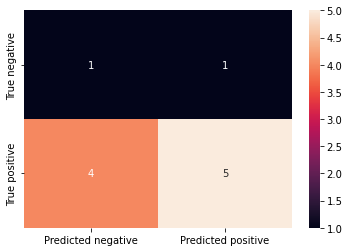

In [417]:
conmat = np.array(confusion_matrix(y_test_ppc, prediction_ppc))
confusion = pd.DataFrame(conmat, index=['True negative', 'True positive'],
                         columns=['Predicted negative','Predicted positive'])

sns.heatmap(confusion, annot=True, fmt = 'g')

Confusion matrix for NDP

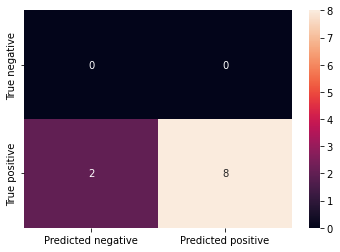

In [418]:
conmat = np.array(confusion_matrix(y_test_ndp, prediction_ndp))
confusion = pd.DataFrame(conmat, index=['True negative', 'True positive'],
                         columns=['Predicted negative','Predicted positive'])

sns.heatmap(confusion, annot=True, fmt = 'g')

**c.** Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 4 parties. From this model, discuss your findings and whether NLP analytics based on tweets is useful for political parties during election campaigns. Explain how each party is viewed in the public eye based on the sentiment value. Suggest one way you can improve the accuracy of this model.

Answer: 

In all the models for liberal, conservative, PPC and NDP the model is always predicting more negative than the true negative value and predicting less positive than the true positive. This is better than the other way around of predicting more positive and less negative than the true values because as a political party it will be more interested in my negative tweets and see the reason why this tweet is negative so I can adjust my campaign.

Also to improve my model accuracy I can do hyperparameter tuning and instead of checking which hyperparameters are giving me the best accuracy I can choose the model with the best F1 score since my data is unbalanced and we are interested in detecting the negative sentiments. Also to improve the model accuracy it would be useful to have for example instead of the sentiment_analysis dataset as a training data, a dataset of tweets related the the past canadian elections of 2019 in order to predict tweets related to the canadian elections of 2021. Also to improve accuracy we can try other features than WF and TF-IDF like for example word embedding.

NLP analytics based on tweets is useful for political parties during election campaigns because they can detect negative tweets or predict which tweets are negative and see the reason behind the negativity to adjust their campain accordingly and maybe change the mind of those people by adjusting their campaign so they can vote for them. For the conservative and liberal the number of positive is slightly bigger than the number of negative tweets meaning sa bit more than half of the tweets is talking positively about them and the slightly less than the half of the population are criticizing them. As for NLP and PCP the majority of the tweets are positive but also here we should bear in mind that the sample size for them is small.

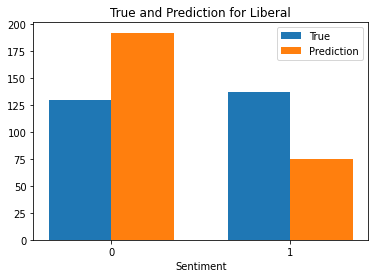

In [419]:
# The difference betweeen the predicted sentiment and the true sentiment in all 4 parties 
# Liberal 
index = np.arange(2)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6,4))
true_val= ax.bar(index, [sum(df_liberal['sentiment']==0),sum(df_liberal['sentiment']==1)], bar_width,
                label='True')

predic = ax.bar(index + bar_width, [sum(prediction_liberal==0),sum(prediction_liberal==1)],
                 bar_width, label='Prediction')

ax.set_xlabel('Sentiment')
ax.set_title('True and Prediction for Liberal')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['0','1'])
ax.legend()

plt.show()

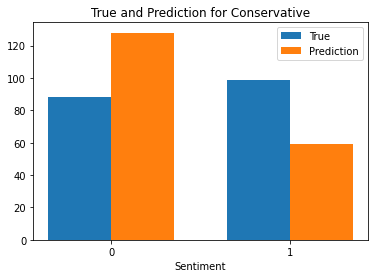

In [420]:
# conservative
index = np.arange(2)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6,4))
true_val= ax.bar(index, [sum(df_conservative['sentiment']==0),sum(df_conservative['sentiment']==1)], bar_width,
                label='True')

predic = ax.bar(index + bar_width, [sum(prediction_conservative==0),sum(prediction_conservative==1)],
                 bar_width, label='Prediction')

ax.set_xlabel('Sentiment')
ax.set_title('True and Prediction for Conservative')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['0','1'])
ax.legend()

plt.show()

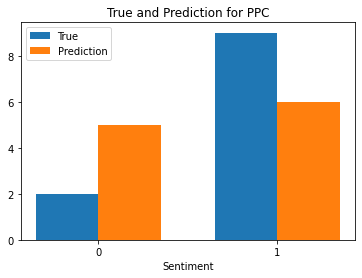

In [421]:
# PPC
index = np.arange(2)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6,4))
true_val= ax.bar(index, [sum(df_ppc['sentiment']==0),sum(df_ppc['sentiment']==1)], bar_width,
                label='True')

predic = ax.bar(index + bar_width, [sum(prediction_ppc==0),sum(prediction_ppc==1)],
                 bar_width, label='Prediction')

ax.set_xlabel('Sentiment')
ax.set_title('True and Prediction for PPC')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['0','1'])
ax.legend()

plt.show()

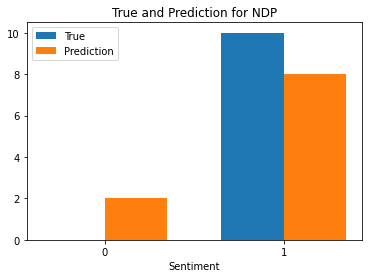

In [422]:
# NDP 
index = np.arange(2)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6,4))
true_val= ax.bar(index, [sum(df_ndp['sentiment']==0),sum(df_ndp['sentiment']==1)], bar_width,
                label='True')

predic = ax.bar(index + bar_width, [sum(prediction_ndp==0),sum(prediction_ndp==1)],
                 bar_width, label='Prediction')

ax.set_xlabel('Sentiment')
ax.set_title('True and Prediction for NDP')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['0','1'])
ax.legend()

plt.show()

**4.2)** Split the negative Canadian elections tweets into training data (70%) and test data (30%). Use the true sentiment labels in the Canadian elections data instead of your predictions from the previous part. Choose one algorithms from classification algorithms (choose any model from logistic regression, k-NN, Naive Bayes, SVM, decision trees, RF, XGBoost), train multi-class classification model to predict the reason for the negative tweets. Tune the hyperparameters and chose the model with best score to test your prediction reason for negative sentiment tweets.

In [466]:
# your code start from here.

# take only negative sentiment from the elections dataframe 
df_ce_negative = df_ce[df_ce['sentiment']==0]
# remove missing make sure that there is no missing values
df_ce_negative['negative_reason'].isnull().sum()

0

In [467]:
# encode the negative reasons
df_ce_negative['negative_reason'].unique()

array(['calling election early', 'covid ', 'others', 'scandal',
       'tell lies', 'gun control', 'economy', 'healthcare and marijuana',
       'segregation', 'women reproductive right and racism',
       'climate problem'], dtype=object)

In [468]:
df_ce_negative['negative_reason'].nunique()

11

In [469]:
df_ce_negative

,text,sentiment,negative_reason
0,canadian election power grab trudeau yes take ...,0,calling election early
1,hope trudeau loses canadian election tomorrow ...,0,covid
3,canadian friends never forget trudeau years ma...,0,calling election early
5,vaccines guns key election otoole serious plan...,0,covid
6,sorry moderators respond leadership candidates...,0,others
...,...,...,...
997,absolutely horrible canada fo hcoming election...,0,others
998,trudeau imposes gun control policies utterly f...,0,gun control
999,canada election stolen thugs uneducated goons ...,0,others
1000,otoole amends platform gun control questions r...,0,tell lies


I will assign a number for each output. As it is not features we do not have to care about the negative effects of caterogical encoding and apply one hot encoding :

In [453]:
list_0to10=np.arange(0,11)

In [454]:
list_0to10=list(list_0to10)

In [455]:
list_0to10

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [456]:
reasons_list=list(df_ce_negative['negative_reason'].unique())

In [457]:
reasons_list

['calling election early',
 'covid ',
 'others',
 'scandal',
 'tell lies',
 'gun control',
 'economy',
 'healthcare and marijuana',
 'segregation',
 'women reproductive right and racism',
 'climate problem']

In [470]:
df_ce_negative['negative_reason']=df_ce_negative['negative_reason'].replace(reasons_list,list_0to10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [471]:
df_ce_negative

,text,sentiment,negative_reason
0,canadian election power grab trudeau yes take ...,0,0
1,hope trudeau loses canadian election tomorrow ...,0,1
3,canadian friends never forget trudeau years ma...,0,0
5,vaccines guns key election otoole serious plan...,0,1
6,sorry moderators respond leadership candidates...,0,2
...,...,...,...
997,absolutely horrible canada fo hcoming election...,0,2
998,trudeau imposes gun control policies utterly f...,0,5
999,canada election stolen thugs uneducated goons ...,0,2
1000,otoole amends platform gun control questions r...,0,4


In [434]:
# Lets now split the data into training and testing 
X = df_ce_negative['text']
y = df_ce_negative['negative_reason'] 
# Split data: 70% for training and 30% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

Since logistic regression got the best accuracy in part 4-a) I will be using logistic regression with word frequency. 
However this doesn't mean that logistic regression will be the better model in the negative_elections dataset, since it is a different dataset it is possible
that other models obtain better accuracy. But more precisely we are asked to train on just one model so I will be using logistic regression.

In [435]:
vectorizer = CountVectorizer(max_features=10000 ) 
X_train_WF = vectorizer.fit_transform(X_train) 
X_test_WF = vectorizer.transform(X_test)
model = LogisticRegression()
model.fit(X_train_WF,y_train)
accuracy_training = accuracy_score(model.predict(X_train_WF),y_train)
accuracy_test = accuracy_score(model.predict(X_test_WF),y_test)
print('We got an accuracy of',round(accuracy_training*100,2),'% on the training set')
print('We got an accuracy of',round(accuracy_test*100,2),'% on the test set')

We got an accuracy of 99.63 % on the training set
We got an accuracy of 50.43 % on the test set


We are clearly overfitting. Let's use grid search in order to hyperparameter tune our model and obtain better results. We will be hyperparameter tuning c and the solver parameter.

In [436]:
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
C = [0.01, 0.1, 1, 10, 100, 1000]

param_grid = [{'C': C, 'solver': solver}]
model = LogisticRegression()
model_cv = GridSearchCV(model, param_grid ,cv=10)
model_cv.fit(X_train_WF,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: Th

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                     'saga']}])

The results of the hyperparameter tuning: 

In [437]:
print('best parameters:',model_cv.best_params_)
print('train accuracy:', round(model_cv.best_score_*100,2),'%')

best parameters: {'C': 1, 'solver': 'liblinear'}
train accuracy: 51.85 %


In [438]:
# Now lets try these hyperparameters on our test data
model = LogisticRegression(C=1,solver='liblinear')
model.fit(X_train_WF,y_train)
accuracy_training = accuracy_score(model.predict(X_train_WF),y_train)
accuracy_test = accuracy_score(model.predict(X_test_WF),y_test)
print('We got an accuracy of',round(accuracy_training*100,2),'% on the training set')
print('We got an accuracy of',round(accuracy_test*100,2),'% on the test set')

We got an accuracy of 99.63 % on the training set
We got an accuracy of 52.99 % on the test set


In [439]:
reasons_list

['calling election early',
 'covid ',
 'others',
 'scandal',
 'tell lies',
 'gun control',
 'economy',
 'healthcare and marijuana',
 'segregation',
 'women reproductive right and racism',
 'climate problem']

# Combined a and b in the same part.

**a. Provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.**  


**b. Suggest one way you can improve the accuracy of your selected model.**

Answer: <br> 
- After hyperparamet tuning, the testing accuracy improved by almost 2%. However the model is clearly over fitted since it is achieving accuracy of  99.63 %  on the training set. To improve accuracy we need to have a biger dataset the one we have here has only 387 datapoints which is very small for this type of problem. Also to improve accuracy I can try other models different than logistic regression, like ensembles (random forest) that will split my data into many and apply decision trees to them. This reduce the probability of overfitting which I have here. Applying deep learning techniques only on 387 datapoints is not that promising. If we want to apply deep learning methods it is better to use the bigger dataset used in the previous parts.<br>

- The data we have is unbalanced and have more negative reasons labeled as 'others' or 2 in my encoded target variable. This lets my model predict also more values as 'other' as highlighted in the bar plot below and in the .value_counts().

In [472]:
df_ce_negative['negative_reason'].value_counts()

2     149
0      73
4      61
1      25
6      20
5      16
10     15
3      14
7       7
9       4
8       3
Name: negative_reason, dtype: int64

Text(0.5, 1.0, 'Negative reason frequency')

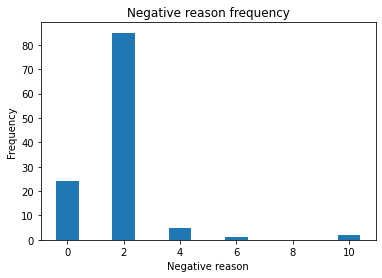

In [441]:
plt.bar(np.unique(model.predict(X_test_WF),return_counts=True)[0],np.unique(model.predict(X_test_WF),return_counts=True)[1])
plt.ylabel('Frequency')
plt.xlabel('Negative reason')
plt.title('Negative reason frequency')

**c. Combine similar reasons into fewer categories, as long as you justify your reasoning. You are free to define input features of your model using word frequency analysis or other techniques.**

In [473]:
# Let's combine them 2 by 2 and leaving the last one others
# I will refer by 0 to 10 
reasons_list

['calling election early',
 'covid ',
 'others',
 'scandal',
 'tell lies',
 'gun control',
 'economy',
 'healthcare and marijuana',
 'segregation',
 'women reproductive right and racism',
 'climate problem']

In [474]:
df_ce_negative['negative_reason']

0       0
1       1
3       0
5       1
6       2
       ..
997     2
998     5
999     2
1000    4
1001    4
Name: negative_reason, Length: 387, dtype: int64

In [475]:
# combine 0-1
# combine 3-4
# combine 5-6
# combine 7-8
# combine 9-10
# leave 2 the others alone


#if (df_ce_negative['negative_reason']==0 & df_ce_negative['negative_reason']==1):

df_ce_negative['negative_reason']=df_ce_negative['negative_reason'].replace([0,1],[0,0])
# others are kept as 2

df_ce_negative['negative_reason']=df_ce_negative['negative_reason'].replace([3,4],[1,1])
df_ce_negative['negative_reason']=df_ce_negative['negative_reason'].replace([5,6],[3,3])
df_ce_negative['negative_reason']=df_ce_negative['negative_reason'].replace([7,8],[4,4])
df_ce_negative['negative_reason']=df_ce_negative['negative_reason'].replace([9,10],[5,5])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [476]:
df_ce_negative['negative_reason'].nunique()

6

In [477]:
df_ce_negative['negative_reason'].unique()

array([0, 2, 1, 3, 4, 5])

In [478]:
df_ce_negative['negative_reason'].value_counts()

2    149
0     98
1     75
3     36
5     19
4     10
Name: negative_reason, dtype: int64

Let' see if it is better now if we solved a little bit the problem of unbalanced 

In [479]:
df_ce_negative

,text,sentiment,negative_reason
0,canadian election power grab trudeau yes take ...,0,0
1,hope trudeau loses canadian election tomorrow ...,0,0
3,canadian friends never forget trudeau years ma...,0,0
5,vaccines guns key election otoole serious plan...,0,0
6,sorry moderators respond leadership candidates...,0,2
...,...,...,...
997,absolutely horrible canada fo hcoming election...,0,2
998,trudeau imposes gun control policies utterly f...,0,3
999,canada election stolen thugs uneducated goons ...,0,2
1000,otoole amends platform gun control questions r...,0,1


In [480]:
# Lets now split the data into training and testing 
X = df_ce_negative['text']
y = df_ce_negative['negative_reason'] 
# Split data: 70% for training and 30% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [481]:
vectorizer = CountVectorizer(max_features=10000)
X_train_WF = vectorizer.fit_transform(X_train) 
X_test_WF = vectorizer.transform(X_test)

In [482]:
model = LogisticRegression()
model.fit(X_train_WF,y_train)
accuracy_training = accuracy_score(model.predict(X_train_WF),y_train)
accuracy_test = accuracy_score(model.predict(X_test_WF),y_test)
print('We got an accuracy of',round(accuracy_training*100,2),'% on the training set')
print('We got an accuracy of',round(accuracy_test*100,2),'% on the test set')

We got an accuracy of 99.63 % on the training set
We got an accuracy of 51.28 % on the test set


we did a little bit of improvement now. let's hyperparameter tune 2 parameters

In [483]:
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
C = [0.01, 0.1, 1, 10, 100, 1000]

param_grid = [{'C': C, 'solver': solver}]
model = LogisticRegression()
model_cv = GridSearchCV(model, param_grid ,cv=10)
model_cv.fit(X_train_WF,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: Th

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                     'saga']}])

In [484]:
print('best parameters:',model_cv.best_params_)
print('train accuracy:', round(model_cv.best_score_*100,2),'%')

best parameters: {'C': 1, 'solver': 'liblinear'}
train accuracy: 50.37 %


In [485]:
# Now lets try these hyperparameters on our test data
model = LogisticRegression(C=1,solver='liblinear')
model.fit(X_train_WF,y_train)
accuracy_training = accuracy_score(model.predict(X_train_WF),y_train)
accuracy_test = accuracy_score(model.predict(X_test_WF),y_test)
print('We got an accuracy of',round(accuracy_training*100,2),'% on the training set')
print('We got an accuracy of',round(accuracy_test*100,2),'% on the test set')

We got an accuracy of 99.63 % on the training set
We got an accuracy of 53.85 % on the test set


Not so much difference after combining the categories 

# Extra part (using deep learning UlmFit developed by fastai). The code is taken from my deep learning class MIE1517 lab4. May not be complete due to time constraint

In [486]:
!pip install fastai

In [487]:
from fastai import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os
from fastai.text import *

In [503]:
df_sa

,text,label
0,josh jenkins looking forward breeders crown su...,1
1,congratulations pakistan becoming no1testteam ...,1
2,september taking maine mendoza surprise thanks...,1
3,newly painted walls thanks million custodial p...,1
4,excited announce july feschotte lab relocating,1
...,...,...
550386,cant stop watching hermm,0
550387,poor old tom odell doesnt look like would know...,0
550388,antsmasher smashed ants awesome gamehjfjfi,1
550389,morning girls wonderful friday,1


In [523]:
df_sa

,text,target
0,josh jenkins looking forward breeders crown su...,1
1,congratulations pakistan becoming no1testteam ...,1
2,september taking maine mendoza surprise thanks...,1
3,newly painted walls thanks million custodial p...,1
4,excited announce july feschotte lab relocating,1
...,...,...
550386,cant stop watching hermm,0
550387,poor old tom odell doesnt look like would know...,0
550388,antsmasher smashed ants awesome gamehjfjfi,1
550389,morning girls wonderful friday,1


In [524]:
df_sa2=df_sa.rename(
    columns={
                "label":"target"}
         
          )

In [525]:
df_sa2


,text,target
0,josh jenkins looking forward breeders crown su...,1
1,congratulations pakistan becoming no1testteam ...,1
2,september taking maine mendoza surprise thanks...,1
3,newly painted walls thanks million custodial p...,1
4,excited announce july feschotte lab relocating,1
...,...,...
550386,cant stop watching hermm,0
550387,poor old tom odell doesnt look like would know...,0
550388,antsmasher smashed ants awesome gamehjfjfi,1
550389,morning girls wonderful friday,1


In [526]:
columns_titles = ["target","text"]
df=df_sa2.reindex(columns=columns_titles)

In [527]:
df

,target,text
0,1,josh jenkins looking forward breeders crown su...
1,1,congratulations pakistan becoming no1testteam ...
2,1,september taking maine mendoza surprise thanks...
3,1,newly painted walls thanks million custodial p...
4,1,excited announce july feschotte lab relocating
...,...,...
550386,0,cant stop watching hermm
550387,0,poor old tom odell doesnt look like would know...
550388,1,antsmasher smashed ants awesome gamehjfjfi
550389,1,morning girls wonderful friday


In [528]:
# the tweets data
X_train=df.head(385273)
# the sentiment related to this data
X_val=df.tail(165118)


In [529]:
print("The number of training samples is: ",len(X_train))
print("The number of validation samples is: ",len(X_val))
#print("The number of testing samples is: ",len(X))

The number of training samples is:  385273
The number of validation samples is:  165118


In [530]:
# create pretrained language model data
data_lm = TextLMDataBunch.from_df(train_df = X_train, valid_df = X_val, path = "")
lang_mod = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=1.)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


Fine tuning

In [531]:
# fine-tune language model data
lang_mod.fit_one_cycle(4, max_lr= 5e-02)
lang_mod.freeze_to(-1)
lang_mod.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))
lang_mod.freeze_to(-2)
lang_mod.fit_one_cycle(3, slice(3e-3/(2.6**4), 1e-3))
lang_mod.unfreeze()
lang_mod.fit_one_cycle(3, slice(3e-3/(2.6**4), 1e-3))

# save language model
lang_mod.save_encoder('my_awsome_encoder')

epoch,train_loss,valid_loss,accuracy,time
0,6.779510,6.436881,0.216304,01:41
1,6.762662,6.371002,0.220074,01:40
2,6.397555,6.146700,0.227450,01:40
3,6.150208,6.052045,0.230900,01:39


epoch,train_loss,valid_loss,accuracy,time
0,6.177444,6.067016,0.230190,01:41
1,6.086981,6.013835,0.233089,01:43
2,5.962105,5.992052,0.233728,01:43


epoch,train_loss,valid_loss,accuracy,time
0,5.846572,5.942247,0.234259,01:41
1,5.757045,5.905715,0.237144,01:42
2,5.723471,5.900841,0.237395,01:42


epoch,train_loss,valid_loss,accuracy,time
0,5.661798,5.878771,0.238608,01:51
1,5.599449,5.848548,0.241515,01:52
2,5.538850,5.844907,0.241777,01:51


In [532]:
df_ce

,text,sentiment,negative_reason
0,canadian election power grab trudeau yes take ...,0,calling election early
1,hope trudeau loses canadian election tomorrow ...,0,covid
2,dear canadians election test progressive wheth...,1,NaN
3,canadian friends never forget trudeau years ma...,0,calling election early
4,sorry voted life election fighting freedoms ca...,1,NaN
...,...,...,...
997,absolutely horrible canada fo hcoming election...,0,others
998,trudeau imposes gun control policies utterly f...,0,gun control
999,canada election stolen thugs uneducated goons ...,0,others
1000,otoole amends platform gun control questions r...,0,tell lies


In [537]:
df2=df_ce.drop(['negative_reason'],axis=1)
df2=df2.rename(
    columns={
                "sentiment":"target"})

In [538]:
df2

,text,target
0,canadian election power grab trudeau yes take ...,0
1,hope trudeau loses canadian election tomorrow ...,0
2,dear canadians election test progressive wheth...,1
3,canadian friends never forget trudeau years ma...,0
4,sorry voted life election fighting freedoms ca...,1
...,...,...
997,absolutely horrible canada fo hcoming election...,0
998,trudeau imposes gun control policies utterly f...,0
999,canada election stolen thugs uneducated goons ...,0
1000,otoole amends platform gun control questions r...,0


In [539]:
columns_titles = ["target","text"]
df2=df2.reindex(columns=columns_titles)

In [540]:
df2

,target,text
0,0,canadian election power grab trudeau yes take ...
1,0,hope trudeau loses canadian election tomorrow ...
2,1,dear canadians election test progressive wheth...
3,0,canadian friends never forget trudeau years ma...
4,1,sorry voted life election fighting freedoms ca...
...,...,...
997,0,absolutely horrible canada fo hcoming election...
998,0,trudeau imposes gun control policies utterly f...
999,0,canada election stolen thugs uneducated goons ...
1000,0,otoole amends platform gun control questions r...


In [541]:
def change_classes(df):
  df.loc[(df['target']==0),'target']="negative"
  df.loc[(df['target']==1),'target']="positive"
  return df

df_train=change_classes(X_train)
df_val=change_classes(X_val)
df_test=change_classes(df2)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [544]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_train,  valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [545]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
xxbos love yo xxrep 10 u much king b xxrep 26 i g h xxrep 14 u g m xxrep 6 u xxrep 6 a xxrep 4 h,positive
xxbos even tho zendaya is nt confirmed playing role mary jane watson i d love bigots read htt …,positive
xxbos hate see girls get back bf cheated like bitch u probably xxunk let ass go htt …,negative
xxbos deans look got boos picking seth win title he s one best deanambrose xxunk h …,positive
xxbos stunning move well done players really great spirit team work among trlday full enthusiasm h …,positive


In [546]:
# create the classifier
learn_classifier = text_classifier_learner(data_clas, drop_mult=0.7, arch = AWD_LSTM)

In [547]:
# load language model
learn_classifier.load_encoder('my_awsome_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (385273 items)
x: TextList
xxbos josh jenkins looking forward breeders crown super sunday,xxbos congratulations pakistan becoming xxunk world odds xxunk,xxbos september taking maine mendoza surprise thanksgiving pa threw fans,xxbos newly painted walls thanks million custodial painters summer great job xxunk,xxbos excited announce july xxunk lab relocating
y: CategoryList
positive,positive,positive,positive,positive
Path: .;

Valid: LabelList (165118 items)
x: TextList
xxbos thankful u,xxbos kill us rohingya refugees fleeing ure rape myanmar,xxbos year dad using good eats recipe making super tasty turkey xxunk,xxbos every thanksgiving dad waits closed grocery store parking lot make fun lastminute shoppers funn,xxbos girl confessed parents xxunk file false case asaram bapu ji
y: CategoryList
positive,negative,positive,positive,negative
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (e

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.25E-02


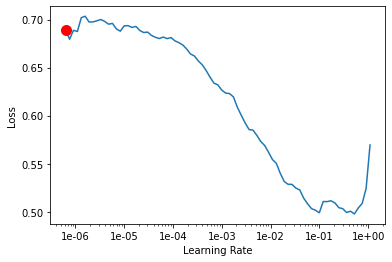

In [548]:
# train classifier
learn_classifier.lr_find()
learn_classifier.recorder.plot(suggestion=True)

In [549]:
learn_classifier.fit_one_cycle(5, max_lr=1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.296442,0.229483,0.901059,02:35
1,0.303355,0.238059,0.905904,02:35
2,0.295036,0.240586,0.896492,02:33
3,0.284212,0.209376,0.912578,02:31
4,0.262421,0.207120,0.913298,02:30


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

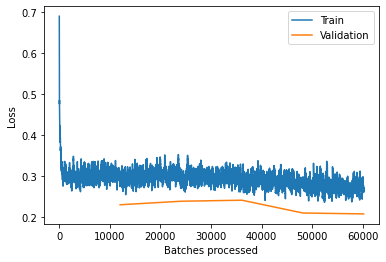

In [550]:
learn_classifier.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.20E-06


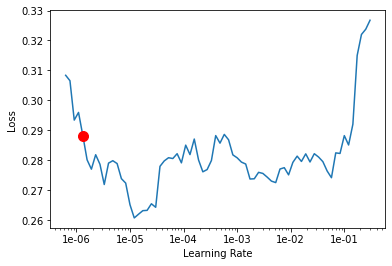

In [551]:
lang_mod.freeze_to(-1)

learn_classifier.lr_find()
learn_classifier.recorder.plot(suggestion=True)

# testing our classifier on random things

In [574]:
learn_classifier.predict('I love Nourhane')

(Category tensor(1), tensor(1), tensor([0.1890, 0.8110]))

In [553]:
learn_classifier.predict('I hate Hurain')

(Category tensor(0), tensor(0), tensor([0.8085, 0.1915]))

In [554]:
learn_classifier.predict('I love Hurain')

(Category tensor(1), tensor(1), tensor([0.1890, 0.8110]))

In [555]:
learn_classifier.predict('I love Trudeau alot')

(Category tensor(1), tensor(1), tensor([0.3084, 0.6916]))

In [557]:
learn_classifier.predict('I love Cedrics cookies alot')

(Category tensor(1), tensor(1), tensor([0.3772, 0.6228]))

In [558]:
learn_classifier.predict('machine learning is sooo cool!')

(Category tensor(1), tensor(1), tensor([0.3997, 0.6003]))

In [559]:
df2

,target,text
0,negative,canadian election power grab trudeau yes take ...
1,negative,hope trudeau loses canadian election tomorrow ...
2,positive,dear canadians election test progressive wheth...
3,negative,canadian friends never forget trudeau years ma...
4,positive,sorry voted life election fighting freedoms ca...
...,...,...
997,negative,absolutely horrible canada fo hcoming election...
998,negative,trudeau imposes gun control policies utterly f...
999,negative,canada election stolen thugs uneducated goons ...
1000,negative,otoole amends platform gun control questions r...


Get the positive sentiments

In [560]:
d=df2.groupby('target')

In [562]:
neg=d.get_group('negative')

In [563]:
neg_list=neg['text'].values

In [565]:
neg_list=list(neg_list)

We got an accuracy of 0.93 !!! detecting negative twwets from the canadian tweets dataset! that's amazing

In [571]:
#ULMFiT
neg_number=0
for i in neg_list:
  pred=learn_classifier.predict(i)
  if pred[1]==0:
    neg_number= neg_number+1
    


In [572]:
neg_number=neg_number/len(neg_list)
print("The accuracy of detecting negative sentiment tweets from Canadian Election is:", neg_number)

The accuracy of detecting negative sentiment tweets from Canadian Election is: 0.9302325581395349


We got an accuracy of 0.93 !!! detecting negative twwets from the canadian tweets dataset! that's amazing better than the classical algorithms

In [568]:
c=df2.groupby('target')
pos=c.get_group('positive')
pos_list=pos['text'].values
pos_list=list(pos_list)

In [573]:
#ULMFiT
pos_number=0
for i in pos_list:
  pred=learn_classifier.predict(i)
  if pred[1]==1:
    pos_number= pos_number+1
    
pos_number=pos_number/len(pos_list)
print("The accuracy of detecting positive sentiment tweets from Canadian Election is:", pos_number)

The accuracy of detecting positive sentiment tweets from Canadian Election is: 0.42276422764227645


But we got an accuracy of 0.4222 here for detecting positive sentiments ! Alot of positive sentiments are misclassified as negative. Need to work on it.

Converting as pdf

In [575]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/Yassine_1008618113_project2.ipynb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum ri
  ruby-dev bu

https://www.youtube.com/watch?v=-Ti9Mm21uVc